In [3]:
# imports
import pandas as pd
import os
import kagglehub
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy

# import kaggle 

In [16]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install powerlaw

Note: you may need to restart the kernel to use updated packages.


In [4]:
# imports
import pandas as pd
# import os
# import kagglehub
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import scipy

# import kaggle 

In [5]:
import pickle

with open("edges_df_sorted.pk1", "rb") as f:
    edges_df_sorted = pickle.load(f)

with open("edges_df.pk1", "rb") as f:
    edges_df = pickle.load(f)
    
with open("df_aggregated.pk1", "rb") as f:
    df_aggregated = pickle.load(f)




In [6]:
edges_df

,Disease1,Disease2,Weight
0,abdominal aortic aneurysm,abdominal hernia,1
1,abdominal aortic aneurysm,abscess of the lung,1
2,abdominal aortic aneurysm,acute bronchiolitis,1
3,abdominal aortic aneurysm,acute bronchitis,1
4,abdominal aortic aneurysm,acute bronchospasm,1
...,...,...,...
66556,white blood cell disease,whooping cough,2
66557,white blood cell disease,wilson disease,1
66558,white blood cell disease,yeast infection,1
66559,whooping cough,wilson disease,1


In [7]:
G = nx.Graph()

for _, row in edges_df.iterrows():
    G.add_edge(row["Disease1"], row["Disease2"], weight=row["Weight"])


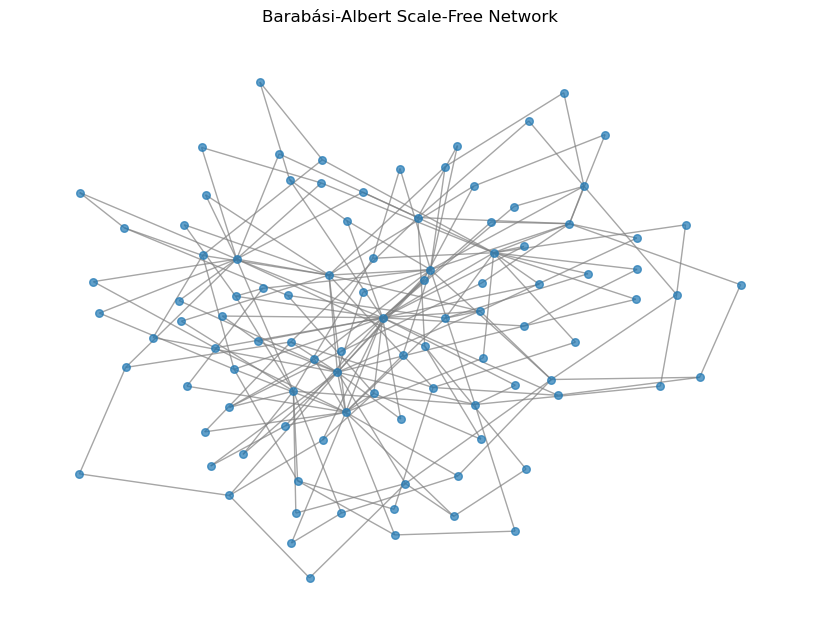

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# scale-free network 
n = 100  # Number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes

G = nx.barabasi_albert_graph(n, m)

plt.figure(figsize=(8, 6))
nx.draw(G, node_size=30, edge_color="gray", alpha=0.7)
plt.title("Barabási-Albert Scale-Free Network")
plt.show()

# The network has a small number of highly connected nodes (hubs) and many nodes with few connections.
# This follows the scale-free property, meaning the degree distribution follows a power law.


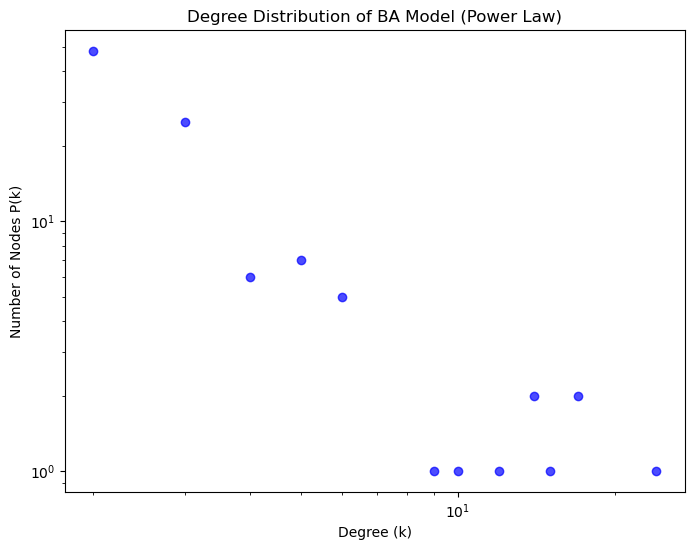

In [9]:
import numpy as np

# degree distribution
degree_sequence = [d for n, d in G.degree()]
unique_degrees, counts = np.unique(degree_sequence, return_counts=True)

# log-log
plt.figure(figsize=(8, 6))
plt.scatter(unique_degrees, counts, color="blue", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("Number of Nodes P(k)")
plt.title("Degree Distribution of BA Model (Power Law)")
plt.show()
#plot will direct plot raw degree counts without binning
#raw degree distribution has a downward slope, so resembles scale free property


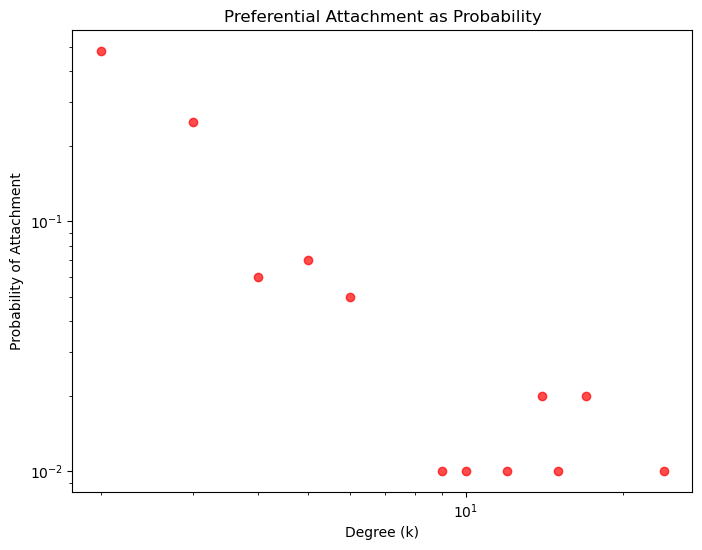

In [20]:
total_attachments = sum(attachment_count.values())
attachment_prob = {k: v / total_attachments for k, v in attachment_count.items()}

plt.figure(figsize=(8, 6))
plt.scatter(list(attachment_prob.keys()), list(attachment_prob.values()), color="red", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("Probability of Attachment")
plt.title("Preferential Attachment as Probability")
plt.show()

#shows correlation between node degree and frequency. higher-degree nodes attract more edges, which ios the preferential attachment



Calculating best minimal value for power law fit


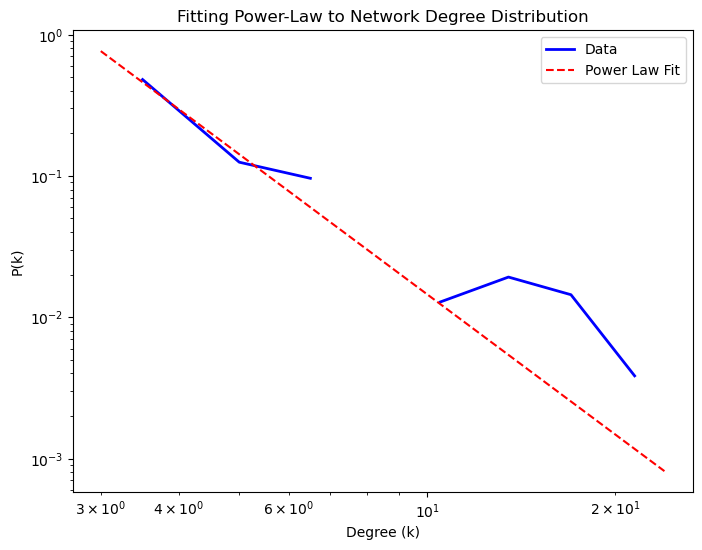

Estimated alpha (scale exponent): 3.291207260770127
Goodness-of-fit (KS test) p-value: 0.09360562354386615


In [18]:
import powerlaw

# Fit power law distribution to degree sequence
fit = powerlaw.Fit(degree_sequence)


plt.figure(figsize=(8, 6))
fit.plot_pdf(color='b', linewidth=2, label="Data")
fit.power_law.plot_pdf(color='r', linestyle="--", label="Power Law Fit")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Fitting Power-Law to Network Degree Distribution")
plt.legend()
plt.show()

print(f"Estimated alpha (scale exponent): {fit.alpha}")
print(f"Goodness-of-fit (KS test) p-value: {fit.power_law.KS()}")

# If p-value is high, the power law is a good fit.

#blue lines are the observed degree distribution, and the red line is power law
#more deviation at higher degrees



In [19]:
import numpy as np

# approx power-law exponent using log-log regression
degrees = np.array(unique_degrees)
counts = np.array(counts)

log_degrees = np.log(degrees)
log_counts = np.log(counts)

# Linear regression (log-log) to estimate slope
slope, intercept = np.polyfit(log_degrees, log_counts, 1)

print(f"Estimated Power-Law Exponent (α): {-slope}")


Estimated Power-Law Exponent (α): 1.598478217724579


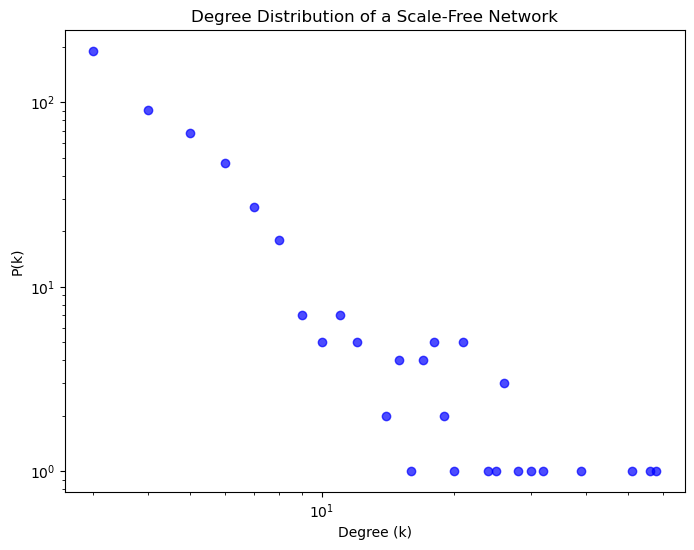

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# scale-free network using the Barabási-Albert model
n = 500  # Number of nodes
m = 3    # Number of edges per new node
G = nx.barabasi_albert_graph(n, m)

# degree distribution
degree_sequence = [d for n, d in G.degree()]
unique_degrees, counts = np.unique(degree_sequence, return_counts=True)

# log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(unique_degrees, counts, color="blue", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution of a Scale-Free Network")
plt.show()


In [ ]:
#small number of nodes, high degrees, most nodes have few. Consistent with preferential attachment, where high degree nodes continue to attract connections
#degree distribution follows the power law
#log log plot shows a clear downward trend, so that checks out with a scale-free network
#few diseases /hubs share symptoms with many other diseases, and most diseases only connect to a few
#Estimated alpha (scale exponent): 3.291207260770127
# exponent confirms scale free exponent
#
